## Captsone Project
This notebook will be used fot the Captsone project for the IBM Data Science Certificate. In this project I will be working on a case study which is to predict the severity of an accident. The data set for this exercise will be from the Seatle city.

In [1]:
import pandas as pd
import numpy as np
print ('Hello Capstone Project Course!')

Hello Capstone Project Course!


# 1 - Introduction / Business Undertanding

### In general

I will ennumerate here some data of interest about the problem that we are going to analyze/evaluate:

- Around 1.35 million people die each year as a result of traffic accidents.
- There is a clear problem and in each country, the objective is to achieve a maximum reduction in car or traffic accidents on public roads. Even the WHO sets ambitious goals such as reducing the number of deaths and injuries from traffic accidents worldwide by almost half.
- Traffic accidents cost most countries 3% of their GDP.
- More than half of deaths from traffic accidents affect "vulnerable road users", that is, pedestrians, cyclists, and motorcyclists.
- Despite the fact that low- and middle-income countries have approximately 60% of the world's vehicles, they account for more than 93% of deaths related to road accidents.
- Traffic accidents are the leading cause of death in children and young people between the ages of 5 and 29.

### In particular for our case:

As for our business case, we are going to focus on the city of Seattle. Our audience in this case is the city council, its mayor and politicians want to solve the big problem of traffic accidents and seek analysis in the available data to be able to implement security measures and applications that help to reduce to the greatest extent possible traffic accidents and its severity.

# 2 - Data

### Brief Description
We need to work on finding the severity of damage caused by accidents and for that we will require a large number of reports on traffic accidents so we can work on a prediction model. The data set provided for this exercise have around 195,000 accidents in the state of Seattle (location in which our focus will be for this exercise), from 2004 to the date it is issued (in 2020), and in which 37 attributes are recorded, such as location, collision type, date, weather, road conditions, etc. The dependent variable, SEVERITYCODE, contains numbers that correspond to different severity level caused by the accident. '1' indicates property damage only collision, and '2' indicates injury collision.

### Data Source
These data have been collected and shared by the Seattle Police Department (Traffic Records)and we have access to the records using the given link.

#### Data set name
Data-Collisions

#### Usage
The data will be used so that we can determine which attributes are most common in traffic accidents in order to target prevention at which are the riskiest points or locations where they happened. We will be able to provide recommendations based on severity of the accidents so far (for what we have data), location of them, weather conditions in which these took place, etc

# 3 - Data cleaning
Before starting to work with the data,it has to be preprocess and cleaned so we use only data that it is interested or valid for the analysis we are going to perform. In this part, data will be cleaned to avouid having missing or unusual values. The goal is to have the data in a way that will be better and more effective for our study.

In [2]:
#Importing libraries

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Downloading the data and creating a dataframe

car_accidents = ("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

In [4]:
df_car_accidents = pd.read_csv(car_accidents)
df_car_accidents.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
#Droping the non-needed columns

df_car_accidents.drop(['X','Y','SEVERITYCODE.1','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'], axis=1, inplace=True)
df_car_accidents.head()

,SEVERITYCODE,OBJECTID,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,1,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN
1,1,2,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,3,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN
3,1,4,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN
4,2,5,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN


In [6]:
df_car_accidents.columns.tolist()

['SEVERITYCODE',
 'OBJECTID',
 'ADDRTYPE',
 'LOCATION',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING']

In [7]:
print(df_car_accidents.shape)

(194673, 16)


# 4 - Studying the Data

In [8]:
df_car_accidents_sevrity = df_car_accidents['SEVERITYCODE']

In [9]:
df_car_accidents_sevrity.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [10]:
df_plot=df_car_accidents_sevrity.value_counts()

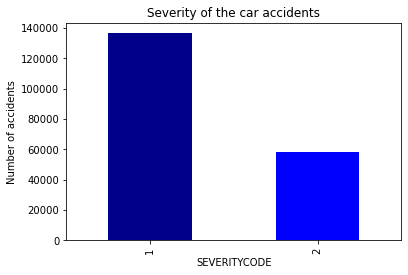

In [11]:
# We can check for example the sevirity code of the accidents for the whole amount of data

df_plot.plot(kind='bar', figsize=(6,4), color=['darkblue','blue'])
             
plt.xlabel('SEVERITYCODE') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Severity of the car accidents') # add title to the plot

plt.show()

In [12]:
df_car_accidents_location = df_car_accidents['ADDRTYPE']

In [13]:
df_car_accidents_location.value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [14]:
df_plot2=df_car_accidents_location.value_counts()

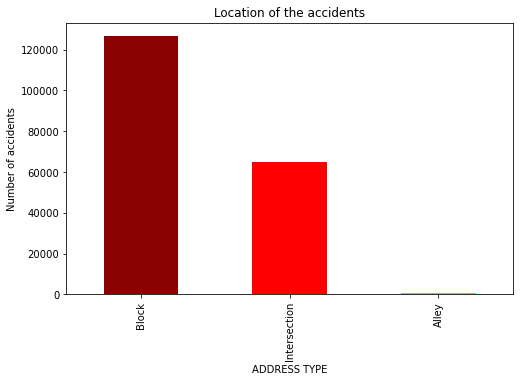

In [15]:
# We can check also where the accidents are most commonly happening

df_plot2.plot(kind='bar', figsize=(8,5), color=['darkred','red','orange'])
             
plt.xlabel('ADDRESS TYPE') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Location of the accidents') # add title to the plot

plt.show()

In [16]:
df_car_accidents_colltype = df_car_accidents['COLLISIONTYPE']

In [17]:
df_car_accidents_colltype.value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [18]:
df_plot3=df_car_accidents_colltype.value_counts()

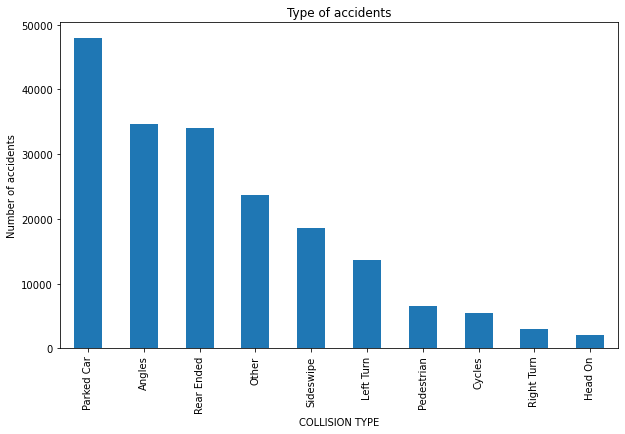

In [19]:
# We can check also the kind of collision  which is more common.

df_plot3.plot(kind='bar', figsize=(10,6))
             
plt.xlabel('COLLISION TYPE') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Type of accidents') # add title to the plot

plt.show()

We can observe that most of the accidents are happening with parked cars. While parking (most probably) or passing by. In angles or in rear ended places of the car is it also quite often. We would need to suggest to the goverment to implement wider or safer parking places and to insist in reminding people to stay focus while driving as this seems to be due to distractions or lack of space.

### Other parameters of Interest:

In [20]:
df_car_accidents_juctiontype = df_car_accidents['JUNCTIONTYPE']
df_car_accidents_juctiontype.value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

half of the times it is intersection related and half of the times not.

In [21]:
df_car_accidents_atention = df_car_accidents['INATTENTIONIND']
df_car_accidents_atention .value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

only around 15% of the times it is related to inatention

In [22]:
df_car_accidents_UNDERINFL = df_car_accidents['UNDERINFL']
df_car_accidents_UNDERINFL.value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

we do not have the meaning of 0,1 in the metadata. So, we wont focus on this. In case we would know the meaning of the coding, it would be interesting, as it seems whichever influence of drugs, even little one it is influencing the number of accidents that take place.

In [23]:
df_car_accidents_WEATHER = df_car_accidents['WEATHER']
df_car_accidents_WEATHER.value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

More than half of the times, aprox 60% weather has not an impact on the accidents. It does not seems to be a high-resk factor or the main issue.

In [24]:
df_car_accidents_ROADCOND = df_car_accidents['ROADCOND']
df_car_accidents_ROADCOND.value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

Most of the accidents are in dry roads. This condition does not seems to be a high-resk factor or the main issue.

In [25]:
df_car_accidents_LIGHTCOND = df_car_accidents['LIGHTCOND']
df_car_accidents_LIGHTCOND.value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

Most of the accidents are during the day. This condition does not seems to be a high-resk factor or the main issue.

In [26]:
df_car_accidents_SPEEDING = df_car_accidents['SPEEDING']
df_car_accidents_SPEEDING.value_counts()

Y    9333
Name: SPEEDING, dtype: int64

Only a few times (aprox 4%) it happens due to high speed. This condition does not seems to be a high-resk factor or the main issue.

### Lets also check the Trend and the Seasonality of the accidents

In [27]:
import datetime as dt
from datetime import timedelta
from datetime import datetime
from datetime import date

In [28]:
df_car_accidents['INCDTTM']

0           3/27/2013 2:54:00 PM
1          12/20/2006 6:55:00 PM
2         11/18/2004 10:20:00 AM
3           3/29/2013 9:26:00 AM
4           1/28/2004 8:04:00 AM
                   ...          
194668     11/12/2018 8:12:00 AM
194669     12/18/2018 9:14:00 AM
194670      1/19/2019 9:25:00 AM
194671      1/15/2019 4:48:00 PM
194672     11/30/2018 3:45:00 PM
Name: INCDTTM, Length: 194673, dtype: object

In [29]:
df_date_str = df_car_accidents[['OBJECTID','SEVERITYCODE','INCDTTM']]
df_date_str.dtypes

OBJECTID         int64
SEVERITYCODE     int64
INCDTTM         object
dtype: object

In [30]:
#in order to eliminate columns without time
df_date_hourly = df_date_str[df_date_str['INCDTTM'].str.contains(':')]
df_date_hourly

,OBJECTID,SEVERITYCODE,INCDTTM
0,1,2,3/27/2013 2:54:00 PM
1,2,1,12/20/2006 6:55:00 PM
2,3,1,11/18/2004 10:20:00 AM
3,4,1,3/29/2013 9:26:00 AM
4,5,2,1/28/2004 8:04:00 AM
...,...,...,...
194668,219543,2,11/12/2018 8:12:00 AM
194669,219544,1,12/18/2018 9:14:00 AM
194670,219545,2,1/19/2019 9:25:00 AM
194671,219546,2,1/15/2019 4:48:00 PM


In [31]:
#Convert back to datatime
df_date_hourly['INCDTTM'] = pd.to_datetime(df_date_hourly['INCDTTM'])
df_date_hourly

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OBJECTID,SEVERITYCODE,INCDTTM
0,1,2,2013-03-27 14:54:00
1,2,1,2006-12-20 18:55:00
2,3,1,2004-11-18 10:20:00
3,4,1,2013-03-29 09:26:00
4,5,2,2004-01-28 08:04:00
...,...,...,...
194668,219543,2,2018-11-12 08:12:00
194669,219544,1,2018-12-18 09:14:00
194670,219545,2,2019-01-19 09:25:00
194671,219546,2,2019-01-15 16:48:00


In [32]:
#Get the HOUR
df_date_hourly['HOUR'] = df_date_hourly['INCDTTM'].dt.hour
df_date_hourly

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OBJECTID,SEVERITYCODE,INCDTTM,HOUR
0,1,2,2013-03-27 14:54:00,14
1,2,1,2006-12-20 18:55:00,18
2,3,1,2004-11-18 10:20:00,10
3,4,1,2013-03-29 09:26:00,9
4,5,2,2004-01-28 08:04:00,8
...,...,...,...,...
194668,219543,2,2018-11-12 08:12:00,8
194669,219544,1,2018-12-18 09:14:00,9
194670,219545,2,2019-01-19 09:25:00,9
194671,219546,2,2019-01-15 16:48:00,16


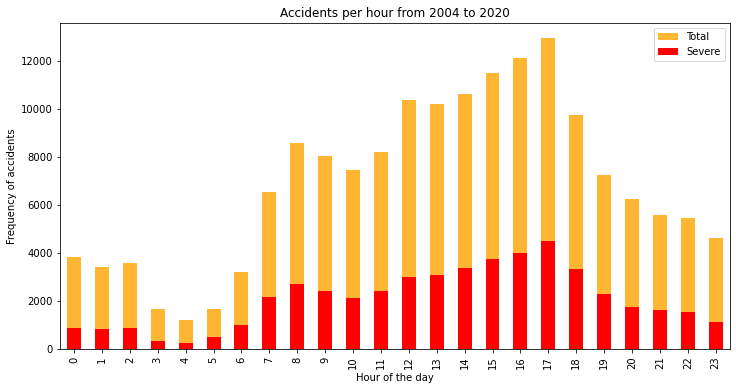

In [33]:
df_hour = df_date_hourly[['OBJECTID','HOUR']].groupby('HOUR').count()
df_hour['SEVERITYCODE'] = df_date_hourly[df_date_hourly.SEVERITYCODE == 2][['OBJECTID','HOUR']].groupby('HOUR').count()
df_hour['OBJECTID'].plot.bar(figsize=(12,6), alpha=0.8, color='orange', label='Total')
df_hour['SEVERITYCODE'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour from 2004 to 2020')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()

#### Per days of the week

In [34]:
#In order to convert INCDATE in a datatime value
df_car_accidents['INCDATE'] = pd.to_datetime(df_car_accidents.INCDATE)
df_car_accidents['INCDATE']

0        2013-03-27 00:00:00+00:00
1        2006-12-20 00:00:00+00:00
2        2004-11-18 00:00:00+00:00
3        2013-03-29 00:00:00+00:00
4        2004-01-28 00:00:00+00:00
                    ...           
194668   2018-11-12 00:00:00+00:00
194669   2018-12-18 00:00:00+00:00
194670   2019-01-19 00:00:00+00:00
194671   2019-01-15 00:00:00+00:00
194672   2018-11-30 00:00:00+00:00
Name: INCDATE, Length: 194673, dtype: datetime64[ns, UTC]

In [35]:
df_car_accidents['INCIDENT_DATE'] = pd.to_datetime(df_car_accidents['INCDATE'].dt.strftime('%Y-%m-%d'))
df_car_accidents['INCIDENT_DATE']

0        2013-03-27
1        2006-12-20
2        2004-11-18
3        2013-03-29
4        2004-01-28
            ...    
194668   2018-11-12
194669   2018-12-18
194670   2019-01-19
194671   2019-01-15
194672   2018-11-30
Name: INCIDENT_DATE, Length: 194673, dtype: datetime64[ns]

In [36]:
df_date = df_car_accidents[['OBJECTID','SEVERITYCODE','INCIDENT_DATE']]
df_date

,OBJECTID,SEVERITYCODE,INCIDENT_DATE
0,1,2,2013-03-27
1,2,1,2006-12-20
2,3,1,2004-11-18
3,4,1,2013-03-29
4,5,2,2004-01-28
...,...,...,...
194668,219543,2,2018-11-12
194669,219544,1,2018-12-18
194670,219545,2,2019-01-19
194671,219546,2,2019-01-15


In [37]:
df_date['year'] = df_date['INCIDENT_DATE'].dt.year
df_date['month'] = df_date['INCIDENT_DATE'].dt.month
df_date['weekday'] = df_date['INCIDENT_DATE'].dt.weekday

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [39]:
df_Injury_collision = df_date[df_date['SEVERITYCODE']==2]
df_Injury_collision

,OBJECTID,SEVERITYCODE,INCIDENT_DATE,year,month,weekday
0,1,2,2013-03-27,2013,3,2
4,5,2,2004-01-28,2004,1,2
7,9,2,2020-04-15,2020,4,2
9,12,2,2006-03-20,2006,3,0
14,19,2,2013-03-31,2013,3,6
...,...,...,...,...,...,...
194663,219536,2,2019-01-09,2019,1,2
194666,219539,2,2019-01-04,2019,1,4
194668,219543,2,2018-11-12,2018,11,0
194670,219545,2,2019-01-19,2019,1,5


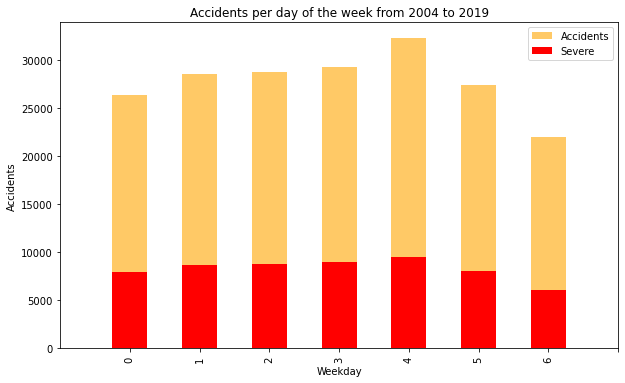

In [40]:
#By day of the week

df_day = df_date[['weekday', 'OBJECTID']].groupby('weekday').count()
df_day['SEVERITYCODE'] = df_Injury_collision[['weekday','OBJECTID']].groupby(['weekday']).count()
df_day['OBJECTID'].plot.bar(figsize=(10,6), alpha=0.6, color='ORANGE',label='Accidents')
df_day['SEVERITYCODE'].plot.bar(color='Red', label='Severe')

plt.title('Accidents per day of the week from 2004 to 2019')
plt.xticks(range(8))
plt.xlim(-1,7)

plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

We can say that normally Sunday is the day where less accidents occur. This makes sense as it is a non-working day and people use les the car. Friday is the one which shows more accidents, it might be due to people going out late in the evening (less focus, maybe alcohol, etc)

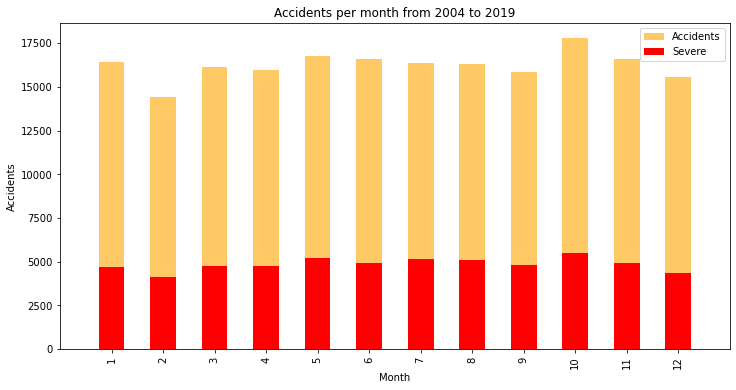

In [41]:
#By month

df_month = df_date[['month', 'OBJECTID']].groupby(['month']).count()
df_month['HIGH_SEVERITY'] = df_Injury_collision[['month','OBJECTID']].groupby(['month']).count()

df_month['OBJECTID'].plot.bar(figsize=(12,6), alpha=0.6, color='orange', label='Accidents')
df_month['HIGH_SEVERITY'].plot.bar(color='r', label='Severe')

plt.title('Accidents per month from 2004 to 2019')
plt.xticks(range(12))
plt.xlim(-1,12)

plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

It is quite similar during every month

Text(0, 0.5, 'Accidents')

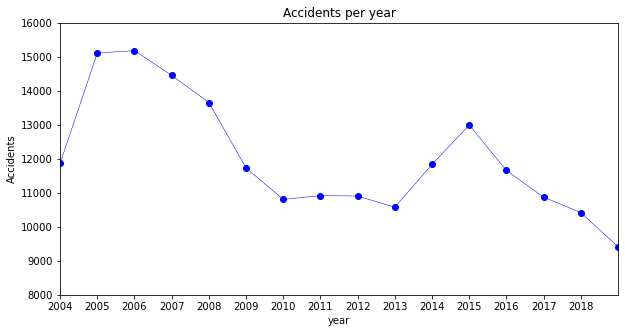

In [42]:
#By year

df_year = df_date[['year', 'OBJECTID']].groupby(['year']).count()
df_year['HIGH_SEVERITY'] = df_Injury_collision[['year','OBJECTID']].groupby(['year']).count()

df_year['OBJECTID'].plot.line(figsize=(10,5), marker='o', linewidth=0.5, color='blue')
plt.title('Accidents per year')
plt.xticks(range(2004,2019))
plt.xlim(2004,2019)
plt.ylim(8000,16000)
plt.ylabel('Accidents')

It is decreasing in the last years, measures are being effective (13-15 again was a bit worse)

In [43]:
#By season

df_SEASON = df_date['INCIDENT_DATE'].dt.quarter
df_SEASON

0         1
1         4
2         4
3         1
4         1
         ..
194668    4
194669    4
194670    1
194671    1
194672    4
Name: INCIDENT_DATE, Length: 194673, dtype: int64

In [44]:
df_plot_SEASON=df_SEASON.value_counts()

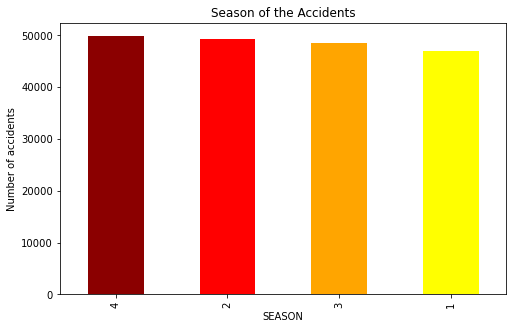

In [45]:
df_plot_SEASON.plot(kind='bar', figsize=(8,5), color=['darkred','red','orange','yellow'])
             
plt.xlabel('SEASON') # add to x-label to the plot
plt.ylabel('Number of accidents') # add y-label to the plot
plt.title('Season of the Accidents') # add title to the plot

plt.show()

aprox. 25% accidentes happens in every of the year quarter (aprox. season). Therefore, it is not really relevant for our case study in whih season the accidents are happening.

#  5 - Data Preparation

In [46]:
df_car_accidents.columns

Index(['SEVERITYCODE', 'OBJECTID', 'ADDRTYPE', 'LOCATION', 'SEVERITYDESC',
       'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'INCIDENT_DATE'],
      dtype='object')

In [47]:
df_car_accidents.drop(['OBJECTID','LOCATION','SEVERITYDESC','INCDATE','INCDTTM','SDOT_COLDESC','UNDERINFL','INCIDENT_DATE'], axis=1, inplace=True)
df_car_accidents.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,Angles,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,Block,Sideswipe,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,Parked Car,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,Block,Other,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,Intersection,Angles,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [48]:
#We need to convert our columns in numeric values assigning the values/codification to numbers.
import pandas as pd
import random

In [49]:
df_car_accidents.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
COLLISIONTYPE     object
JUNCTIONTYPE      object
INATTENTIONIND    object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
dtype: object

In [50]:
df_numeric = df_car_accidents.select_dtypes(include=['int64','object']).copy()
df_numeric.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,Angles,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,Block,Sideswipe,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,Parked Car,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,Block,Other,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,Intersection,Angles,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [51]:
df_numeric['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [52]:
df_numeric['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [53]:
df_numeric['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [54]:
df_numeric['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [55]:
df_numeric['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [56]:
df_numeric['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [57]:
df_numeric['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [58]:
df_numeric['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [59]:
df_nums = {"ADDRTYPE":      {"Block":1,"Intersection":2,"Alley":3},
           "COLLISIONTYPE": {"Parked Car":1,"Angles":2,"Rear Ended":3,"Other":4,"Sideswipe":5,"Left Turn":6,"Pedestrian":7,"Cycles":8,"Right Turn":9,"Head On":10},
           "JUNCTIONTYPE":  {"Mid-Block (not related to intersection)":1,"At Intersection (intersection related)":2,"Mid-Block (but intersection related)":3,"Driveway Junction":4,"At Intersection (but not related to intersection)":5,"Ramp Junction":6,"Unknown":7},
           "INATTENTIONIND":{"Y":1},
           "WEATHER":       {"Clear":1,"Raining":2,"Overcast":3,"Unknown":4,"Snowing":5,"Other":6,"Fog/Smog/Smoke":7,"Sleet/Hail/Freezing Rain":8,"Blowing Sand/Dirt":9,"Severe Crosswind":10,"Partly Cloudy":11},
           "ROADCOND":      {"Dry":1,"Wet":2,"Unknown":3,"Ice":4,"Snow/Slush":5,"Other":6,"Standing Water":7,"Sand/Mud/Dirt":8,"Oil":9},
           "LIGHTCOND":     {"Daylight":1,"Dark - Street Lights On":2,"Unknown":3,"Dusk":4,"Dawn":5,"Dark - No Street Lights":6,"Dark - Street Lights Off":7,"Other":8,"Dark - Unknown Lighting":9},
           "SPEEDING":      {"Y":1}}

In [60]:
df_numeric.replace(df_nums, inplace=True)
df_numeric.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2.0,2.0,2.0,NaN,3.0,2.0,1.0,NaN
1,1,1.0,5.0,1.0,NaN,2.0,2.0,2.0,NaN
2,1,1.0,1.0,1.0,NaN,3.0,1.0,1.0,NaN
3,1,1.0,4.0,1.0,NaN,1.0,1.0,1.0,NaN
4,2,2.0,2.0,2.0,NaN,2.0,2.0,1.0,NaN


In [61]:
df_numeric = df_numeric.replace(np.nan,'', regex=True)
df_numeric.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2,2,2,,3,2,1,
1,1,1,5,1,,2,2,2,
2,1,1,1,1,,3,1,1,
3,1,1,4,1,,1,1,1,
4,2,2,2,2,,2,2,1,


In [62]:
df_numeric = df_numeric.replace('',0,regex=True)
df_numeric

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,2.0,2.0,2.0,0.0,3.0,2.0,1.0,0.0
1,1,1.0,5.0,1.0,0.0,2.0,2.0,2.0,0.0
2,1,1.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0
3,1,1.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0
4,2,2.0,2.0,2.0,0.0,2.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
194668,2,1.0,10.0,1.0,0.0,1.0,1.0,1.0,0.0
194669,1,1.0,3.0,1.0,1.0,2.0,2.0,1.0,0.0
194670,2,2.0,6.0,2.0,0.0,1.0,1.0,1.0,0.0
194671,2,2.0,8.0,2.0,0.0,1.0,1.0,4.0,0.0


In [63]:
df_numeric.dtypes

SEVERITYCODE        int64
ADDRTYPE          float64
COLLISIONTYPE     float64
JUNCTIONTYPE      float64
INATTENTIONIND    float64
WEATHER           float64
ROADCOND          float64
LIGHTCOND         float64
SPEEDING          float64
dtype: object

In [64]:
df_numeric['SEVERITYCODE'] = df_numeric['SEVERITYCODE'].astype('float64')
df_numeric.dtypes

SEVERITYCODE      float64
ADDRTYPE          float64
COLLISIONTYPE     float64
JUNCTIONTYPE      float64
INATTENTIONIND    float64
WEATHER           float64
ROADCOND          float64
LIGHTCOND         float64
SPEEDING          float64
dtype: object

In [65]:
df_numeric

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2.0,2.0,2.0,2.0,0.0,3.0,2.0,1.0,0.0
1,1.0,1.0,5.0,1.0,0.0,2.0,2.0,2.0,0.0
2,1.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0
3,1.0,1.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0
4,2.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
194668,2.0,1.0,10.0,1.0,0.0,1.0,1.0,1.0,0.0
194669,1.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,0.0
194670,2.0,2.0,6.0,2.0,0.0,1.0,1.0,1.0,0.0
194671,2.0,2.0,8.0,2.0,0.0,1.0,1.0,4.0,0.0


In [66]:
#Features have different values range. Some from 1 to 11 while others just go from 1 to 2, 
#Normalizing the data makes that none of the features will have more impact in the rusult that others.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# X = df.drop('sev', axis=1)
# X = StandardScaler().fit(X).transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(df_numeric.drop('SEVERITYCODE', axis=1), df_numeric['SEVERITYCODE'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2) 

print('Size of training set:', xtrain.shape[0],'\n'
      'Size of test set:',xtest.shape[0],'\n'
      'Size of evaluation set:', xval.shape[0])

Size of training set: 124590 
Size of test set: 38935 
Size of evaluation set: 31148


# 5. Model Develoment

In [67]:
#Importing the models

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation Metrics
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

## 1. Decision Tree

In [68]:
dec_tree = DecisionTreeClassifier(criterion='entropy')
dec_tree.fit(xtrain,ytrain)
yhat = dec_tree.predict(xval)
score_tree = accuracy_score(yval,yhat)
print('Accuracy :',score_tree)

Accuracy : 0.7438358803133428


## 2. LogisticRegression

In [69]:
#Looking for hte best coeficient to create the model.

acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.71134583, 0.71137794, 0.71208424, 0.71439579, 0.71134583,
       0.71134583])

In [70]:
#Model Evaluation

lr = LogisticRegression(C=0.001, solver='liblinear').fit(xtrain, ytrain)
yhat = lr.predict(xtest)
jaccard_lr = jaccard_similarity_score(ytest,yhat)
c_lr = classification_report(ytest,yhat)
prec_lr = precision_score(ytest, yhat)
rec_lr = recall_score(ytest, yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Jaccard : 0.7162963914216001 
               precision    recall  f1-score   support

         1.0       0.73      0.94      0.82     27294
         2.0       0.58      0.18      0.28     11641

   micro avg       0.72      0.72      0.72     38935
   macro avg       0.66      0.56      0.55     38935
weighted avg       0.69      0.72      0.66     38935



## 3. KNN

In [71]:
tt = xtrain.shape[0]
tv = xval.shape[0]

In [72]:
#Looking for the best K to fit the model with the training set and evaluate it with the test set.

ks = 10
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    knn = KNeighborsClassifier(n_neighbors = n).fit(xtrain,ytrain)
    yhat = knn.predict(xval)
    mean_acc[n-1] = accuracy_score(yval,yhat)
    std_acc[n-1] = np.std(yhat==yval)/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 8 with an accuracy of 0.7414922306408116


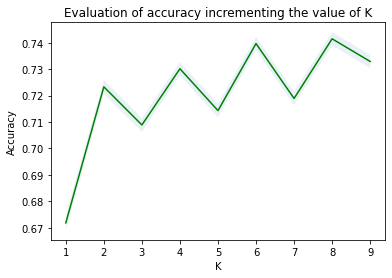

In [73]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [74]:
#Evaluation

model_knn = KNeighborsClassifier(n_neighbors = 4, n_jobs=-1)
model_knn.fit(xtrain,ytrain)
yhat = model_knn.predict(xtest)
jaccard_knn = jaccard_similarity_score(ytest,yhat)
c_knn = classification_report(ytest,yhat)
prec_knn = precision_score(ytest, yhat)
rec_knn = recall_score(ytest, yhat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Jaccard : 0.7304995505329395 
               precision    recall  f1-score   support

         1.0       0.74      0.95      0.83     27294
         2.0       0.66      0.21      0.32     11641

   micro avg       0.73      0.73      0.73     38935
   macro avg       0.70      0.58      0.57     38935
weighted avg       0.71      0.73      0.68     38935



## 4. SVM

In [75]:
# quiza eliminarlo - tarda demasiado
size = [1000,10000,20000,30000,40000,50000,100000]
acc = []
for s in size:
    sv = SVC().fit(xtrain[:s],ytrain[:s])
    yhat = sv.predict(xval[:s])
    acc.append(jaccard_similarity_score(yval[:s],yhat))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/co

In [76]:
performance = pd.DataFrame({'acc':acc}, index=size)
performance

,acc
1000,0.737000
10000,0.744000
20000,0.748600
30000,0.747900
40000,0.747785
50000,0.748042
100000,0.748234


Text(0.5, 1.0, 'Accuracy')

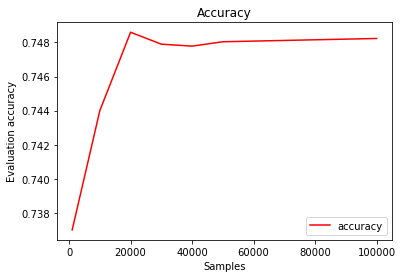

In [77]:
performance.plot(y='acc', color='r', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')

In [78]:
#Evaluation

s=75000
sv = SVC().fit(xtrain[:s],ytrain[:s])
yhat = sv.predict(xtest[:s])
jaccard_svm = jaccard_similarity_score(ytest[:s],yhat)
c_svm = classification_report(ytest[:s],yhat)
prec_svm = precision_score(ytest[:s], yhat)
rec_svm = recall_score(ytest[:s], yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Jaccard : 0.7162963914216001 
               precision    recall  f1-score   support

         1.0       0.73      0.94      0.82     27294
         2.0       0.58      0.18      0.28     11641

   micro avg       0.72      0.72      0.72     38935
   macro avg       0.66      0.56      0.55     38935
weighted avg       0.69      0.72      0.66     38935



# 7. Results

| Algorithm | Jaccard | f1-score | Precision | Recall |
|-----------|---------|----------|-----------|--------|
| Logistic Regression | 0.72 | 0.66 | 0.69 | 0.62 |
| KNN | 0.73 | 0.68 | 0.71 | 0.73 |
| SVM | 0.72 | 0.66 | 0.69 | 0.72 |